### 1. Import

In [1]:
# import libs
import glob
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
from tqdm import tqdm

### 2. Data preparation

In [2]:
activity_folders = ['idle', 'running', 'walking', 'stairs']
path_data = 'data'

Read the files from the directory

In [3]:
def get_files(path_to, folder):
    custom_path = os.path.join(path_to, activity_folders[folder], '*.csv')
    filenames = glob.glob(custom_path)
    return filenames

In [4]:
idle_filenames = get_files(path_data, 0)
running_filenames = get_files(path_data, 1)
walking_filenames = get_files(path_data, 2)
stairs_filenames = get_files(path_data, 3)

count how many data files

In [5]:
print("There are:\n {0} idle {4}\n {1} running {4}\n {2} stairs {4}\n {3} walking {4}\n ".format(len(idle_filenames), len(running_filenames), len(stairs_filenames), len(walking_filenames), 'files'))

There are:
 1039 idle files
 3408 running files
 165 stairs files
 1850 walking files
 


Function to get files data and add the data to dataframe

In [29]:
columns_to_keep = ['X_mean', 'Y_mean', 'Z_mean', 'X_stdev', 'Y_stdev', 'Z_stdev', 'label', 'filename']

def get_file_data(filenames):
    regex = re.compile('^[a-zA-Z]*')
    li = []
    for f in filenames:
        full_name = os.path.basename(f)
        df = pd.read_csv(f, index_col=None, header=0)

        # calculate mean and standard deviation value for coordinates in each file with activity
        ndf = df.copy().to_numpy()

        column_means = ndf.mean(axis=0)
        column_stdev = ndf.std(axis=0)

        df['X_mean'] = column_means[0]
        df['Y_mean'] = column_means[1]
        df['Z_mean'] = column_means[2]

        df['X_stdev'] = column_stdev[0]
        df['Y_stdev'] = column_stdev[1]
        df['Z_stdev'] = column_stdev[2]

        # adding label and source filename to the DF
        new_name = regex.match(full_name).group()

        # adding label to the DF
        df['label'] = new_name
        df['filename'] = full_name

        # removing columns with raw data
        df.drop(df.columns[[0, 1, 2]], axis = 1, inplace = True)
        df = df.drop_duplicates(ignore_index=True)

        li.append(df)
    df = pd.concat(li, axis=0, ignore_index=True)
    return  df

In [7]:
dataframes = []

**Get idle accelerometer data**

In [35]:
for i in tqdm(range(25), desc='Progress'):
    df_idle_data = get_file_data(idle_filenames)
dataframes.append(df_idle_data)

Progress: 100%|██████████| 25/25 [04:07<00:00,  9.91s/it]


**Get running accelerometer data**

In [36]:
for i in tqdm(range(25), desc='Progress'):
    df_running_data = get_file_data(running_filenames)
dataframes.append(df_running_data)

Progress: 100%|██████████| 25/25 [14:48<00:00, 35.55s/it]


**Get stairs accelerometer data**

In [32]:
for i in tqdm(range(25), desc='Progress'):
    df_stairs_data = get_file_data(stairs_filenames)
dataframes.append(df_stairs_data)

Progress: 100%|██████████| 25/25 [00:34<00:00,  1.37s/it]


**Get walking accelerometer data**

In [37]:
for i in tqdm(range(25), desc='Progress'):
    df_walking_data = get_file_data(walking_filenames)
dataframes.append(df_walking_data)

Progress: 100%|██████████| 25/25 [07:38<00:00, 18.35s/it]


In [12]:
dataframes_merged = pd.concat(objs=dataframes, axis=0, ignore_index=True)

In [13]:
dataframes_merged.tail()

,X_mean,Y_mean,Z_mean,X_stdev,Y_stdev,Z_stdev,label,filename
193855,1.131979,-10.937192,0.26017,4.141624,5.351603,7.808017,walking,walking-999.csv
193856,1.131979,-10.937192,0.26017,4.141624,5.351603,7.808017,walking,walking-999.csv
193857,1.131979,-10.937192,0.26017,4.141624,5.351603,7.808017,walking,walking-999.csv
193858,1.131979,-10.937192,0.26017,4.141624,5.351603,7.808017,walking,walking-999.csv
193859,1.131979,-10.937192,0.26017,4.141624,5.351603,7.808017,walking,walking-999.csv


calculate how many observations of each activity type

In [14]:
print(df_idle_data['label'].value_counts())
print(df_running_data['label'].value_counts())
print(df_stairs_data['label'].value_counts())
print(df_walking_data['label'].value_counts())

idle    31170
Name: label, dtype: int64
running    102240
Name: label, dtype: int64
stairs    4950
Name: label, dtype: int64
walking    55500
Name: label, dtype: int64


visualize accelerometer data frequency of the entire dataset

In [15]:
# Plots are X, Y, Z acceleration amplitudes of 4 activities.
import matplotlib.pyplot as plt

def plot_xyz_output(x, y, z, title_x, title_y, title_z):
    fig, axs = plt.subplots(3,1, figsize=(14,12))
    plt.subplots_adjust(hspace=0.5)
    axs[0].plot(x)
    axs[0].set_title(title_x)
    axs[0].set_xlabel('Samples')
    axs[0].set_ylabel('A[m/s^2]')
    axs[1].plot(y)
    axs[1].set_title(title_y)
    axs[1].set_xlabel('Samples')
    axs[1].set_ylabel('A[m/s^2]')
    axs[2].plot(z)
    axs[2].set_title(title_z)
    axs[2].set_xlabel('Samples')
    axs[2].set_ylabel('A[m/s^2]')
    plt.show()

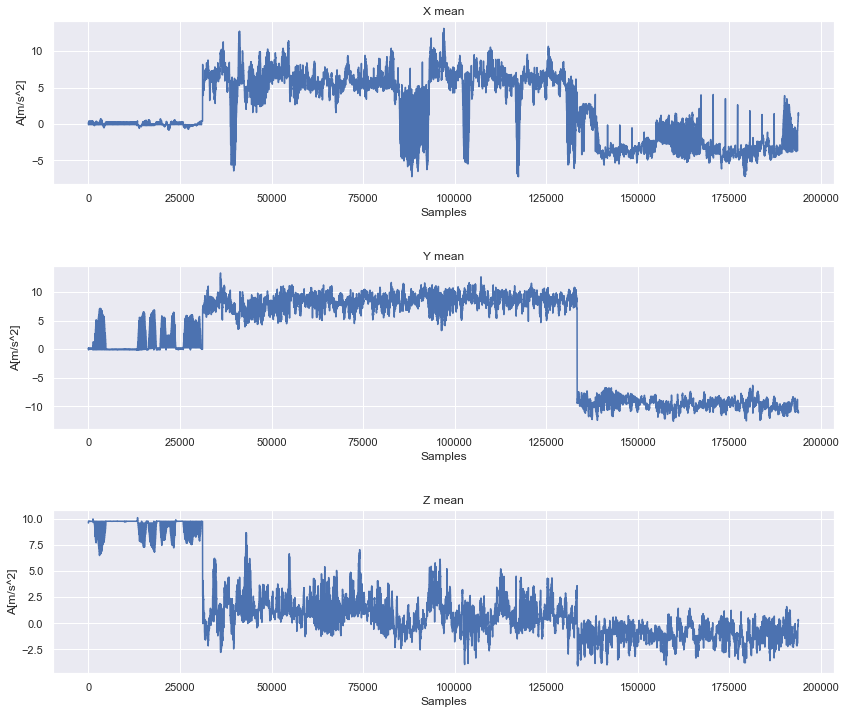

In [16]:
plot_xyz_output(x = dataframes_merged['X_mean'], y = dataframes_merged['Y_mean'], z = dataframes_merged['Z_mean'], title_x='X mean', title_y= 'Y mean', title_z= 'Z mean')

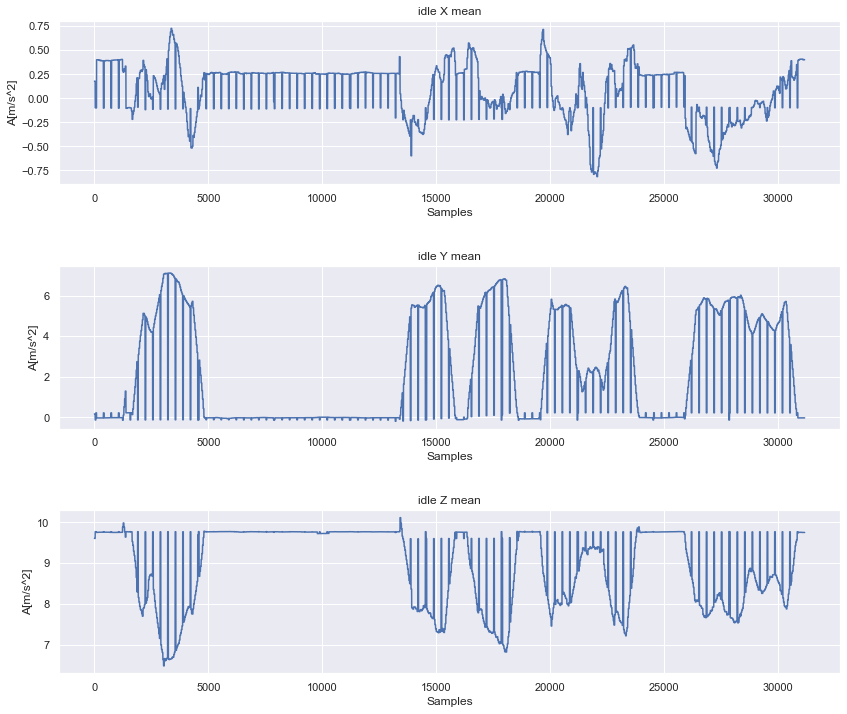

In [17]:
plot_xyz_output(x = df_idle_data['X_mean'], y = df_idle_data['Y_mean'], z = df_idle_data['Z_mean'], title_x='idle X mean', title_y= 'idle Y mean', title_z= 'idle Z mean')

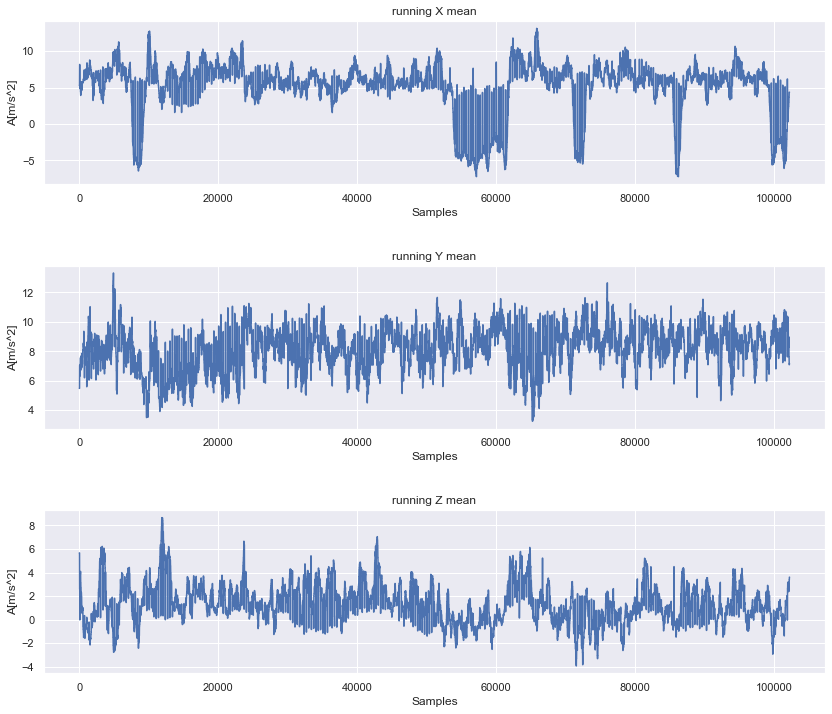

In [18]:
plot_xyz_output(x = df_running_data['X_mean'], y = df_running_data['Y_mean'], z = df_running_data['Z_mean'], title_x='running X mean', title_y= 'running Y mean', title_z= 'running Z mean')

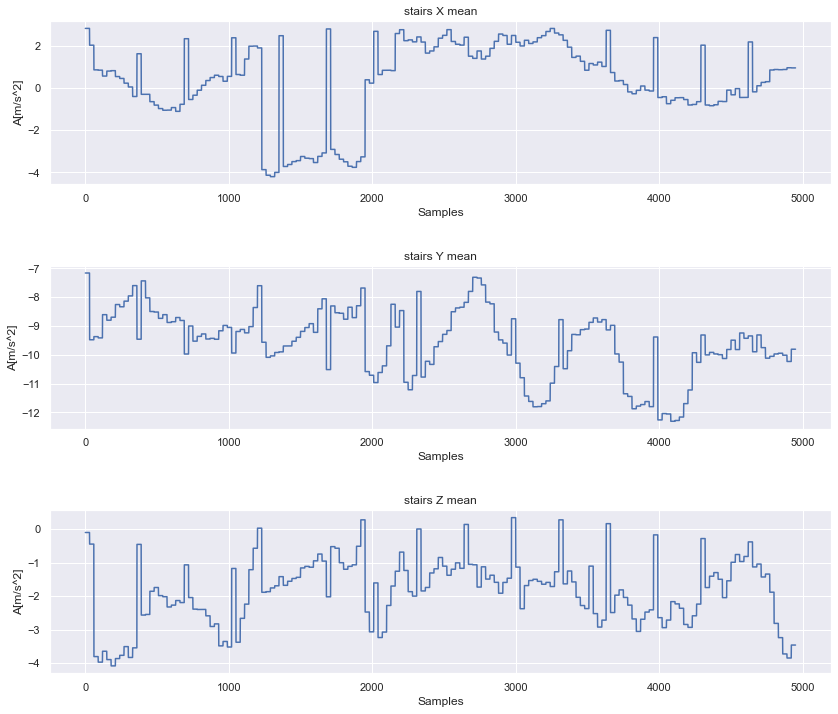

In [19]:
plot_xyz_output(x = df_stairs_data['X_mean'], y = df_stairs_data['Y_mean'], z = df_stairs_data['Z_mean'], title_x='stairs X mean', title_y= 'stairs Y mean', title_z= 'stairs Z mean')

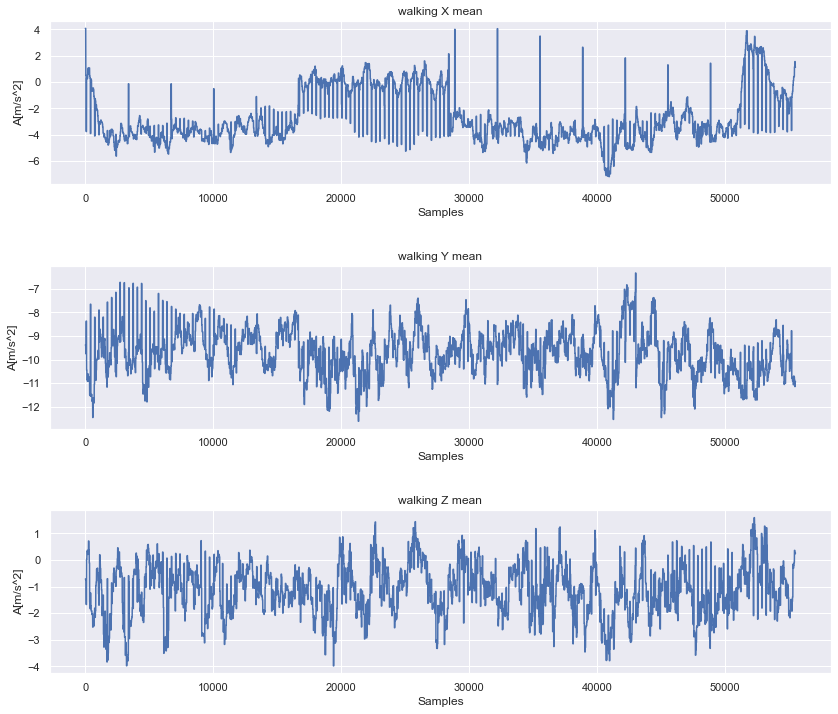

In [20]:
plot_xyz_output(x = df_walking_data['X_mean'], y = df_walking_data['Y_mean'], z = df_walking_data['Z_mean'], title_x='walking X mean', title_y= 'walking Y mean', title_z= 'walking Z mean')

visualize accelerometer data frequency of 1 random sample file

In [21]:
import random as rand
random_idle_file_index = rand.randint(0, df_idle_data['label'].value_counts().loc['idle'])
rand_idle_file = df_idle_data.iloc[random_idle_file_index].loc['filename']
rand_idle_file = df_idle_data[df_idle_data['filename'] == rand_idle_file]
rand_idle_file

,X_mean,Y_mean,Z_mean,X_stdev,Y_stdev,Z_stdev,label,filename
11340,0.256658,-0.011013,9.76962,0.037817,0.037073,0.01927,idle,idle-403.csv
11341,0.256658,-0.011013,9.76962,0.037817,0.037073,0.01927,idle,idle-403.csv
11342,0.256658,-0.011013,9.76962,0.037817,0.037073,0.01927,idle,idle-403.csv
11343,0.256658,-0.011013,9.76962,0.037817,0.037073,0.01927,idle,idle-403.csv
11344,0.256658,-0.011013,9.76962,0.037817,0.037073,0.01927,idle,idle-403.csv
11345,0.256658,-0.011013,9.76962,0.037817,0.037073,0.01927,idle,idle-403.csv
11346,0.256658,-0.011013,9.76962,0.037817,0.037073,0.01927,idle,idle-403.csv
11347,0.256658,-0.011013,9.76962,0.037817,0.037073,0.01927,idle,idle-403.csv
11348,0.256658,-0.011013,9.76962,0.037817,0.037073,0.01927,idle,idle-403.csv
11349,0.256658,-0.011013,9.76962,0.037817,0.037073,0.01927,idle,idle-403.csv


In [22]:
import random as rand

def get_random_file(dataframe, activity_type):
    # generate random index between 0 and the maximum value index of the dataframe
    random_file_index = rand.randint(0, dataframe['label'].value_counts().loc[activity_type])
    # get the filename behind the generated index
    rand_file = dataframe.iloc[random_file_index].loc['filename']
    # filter the dataframe by the defined filename and create a new dataframe
    df_rand_file = dataframe[dataframe['filename'] == rand_file]
    return df_rand_file

In [23]:
df_1_idle = get_random_file(df_idle_data, 'idle')
plot_xyz_output(x = df_1_idle['accelerometer_X'], y = df_1_idle['accelerometer_Y'], z = df_1_idle['accelerometer_Z'], title_x='idle X', title_y= 'idle Y', title_z= 'idle Z')

KeyError: 'accelerometer_X'

In [ ]:
df_1_run = get_random_file(df_running_data, 'running')
plot_xyz_output(x = df_1_run['accelerometer_X'], y = df_1_run['accelerometer_Y'], z = df_1_run['accelerometer_Z'], title_x='running X', title_y= 'running Y', title_z= 'running Z')

In [ ]:
df_1_stair = get_random_file(df_stairs_data, 'stairs')
plot_xyz_output(x = df_1_stair['accelerometer_X'], y = df_1_stair['accelerometer_Y'], z = df_1_stair['accelerometer_Z'], title_x='stairs X', title_y= 'stairs Y', title_z= 'stairs Z')

In [ ]:
df_1_walk = get_random_file(df_walking_data, 'walking')
plot_xyz_output(x = df_1_walk['accelerometer_X'], y = df_1_walk['accelerometer_Y'], z = df_1_walk['accelerometer_Z'], title_x='walking X', title_y= 'walking Y', title_z= 'walking Z')

In [ ]:
plt.subplots(1,1, figsize=(12,6))
NFFT = 512
noverlap = int(0.50 * NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_idle_data['accelerometer_X'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

In [ ]:
plt.subplots(1,1, figsize=(12,6))
NFFT = 128
noverlap = int(0.50 * NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_idle_data['accelerometer_X'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

In [ ]:
plt.subplots(1,1, figsize=(12,6))
NFFT = 128
noverlap = int(0.50 * NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_idle_data['accelerometer_Y'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

In [ ]:
plt.subplots(1,1, figsize=(12,6))
NFFT = 128
noverlap = int(0.50 * NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_idle_data['accelerometer_Z'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

In [ ]:
plt.subplots(1,1, figsize=(12,6))
NFFT = 128
noverlap = int(0.50 * NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_1_idle['accelerometer_X'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

In [ ]:
from scipy import fftpack
from numpy.fft import fft
def new_display_fft(signal, sampling_freq, title):
    # fig, axs = plt.subplots(3,1, figsize=(14,12))
    N = signal.shape[0]
    T = 1.0 / sampling_freq
    x = np.linspace(0, N*T, N)
    y = signal
    yf = fft(signal)
    f_s = sampling_freq
    yf = np.abs(yf) * 2.0 / N  # Normalize the wave
    #xf = np.linspace(0, 1 / (2.0*T), N)
    xf = fftpack.fftfreq(len(signal)) * f_s
    fig, ax = plt.subplots(figsize=(10,5))
    plt.title(title)
    ax.set_xlim(0, sampling_freq / 2)
    ax.plot(xf,yf)
    plt.show()

In [ ]:
new_display_fft(df_idle_data["accelerometer_X"], 32.0, "idle x")
new_display_fft(df_walking_data["accelerometer_X"], 32.0, "walking x")
new_display_fft(df_stairs_data["accelerometer_X"], 32.0, "stairs x")
new_display_fft(df_running_data["accelerometer_X"], 32.0, "running x")
new_display_fft(df_idle_data["accelerometer_Y"], 32.0, "idle y")
new_display_fft(df_walking_data["accelerometer_Y"], 32.0, "walking y")
new_display_fft(df_stairs_data["accelerometer_Y"], 32.0, "stairs y")
new_display_fft(df_running_data["accelerometer_Y"], 32.0, "running y")
new_display_fft(df_idle_data["accelerometer_Z"], 32.0, "idle z")
new_display_fft(df_walking_data["accelerometer_Z"], 32.0, "walking z")
new_display_fft(df_stairs_data["accelerometer_Z"], 32.0, "stairs z")
new_display_fft(df_running_data["accelerometer_Z"], 32.0, "running z")


## Filter design

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
def bandpass_filter(signal, sample_rate, low_f, high_f, numt):

    # The cutoff frequency of the filter: 6KHz
    low_f = low_f / (sample_rate * 2)
    high_f = high_f / (sample_rate * 2)
    numtaps = numt
    delay = 0.5 * numtaps
    # Use firwin to create a lowpass FIR filter
    fir_coeff = firwin(numtaps, [low_f, high_f], pass_zero=False)
    # Use lfilter to filter the signal with the FIR filter
    filtered_signal = lfilter(fir_coeff, 1.0, signal)
    return filtered_signal, delay

newx, delay = bandpass_filter(df_walking_data['accelerometer_X'], 32.0, 2.0, 8.0, 250)

plt.plot(df_walking_data['accelerometer_X'][0:2000], label='Unfiltered Signal')
t = np.arange(len(df_walking_data['accelerometer_X'][0:2000]))
plt.plot((t-delay)[0:2000], newx[0:2000], '-r', label='Filtered Signal')
plt.title("Walk X data")
plt.legend()
plt.show()

In [ ]:
plt.subplots(1,1, figsize=(12,6))
NFFT=128
noverlap = int(0.50*NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(newx, Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

### Collect the filtered data

In [ ]:
def filter_data(df, sample_rate, low_f, high_f, numt):

    filtered_x, delay = bandpass_filter(df["accelerometer_X"], sample_rate, low_f, high_f, numt)
    filtered_y, delay = bandpass_filter(df["accelerometer_Y"], sample_rate, low_f, high_f, numt)
    filtered_z, delay = bandpass_filter(df["accelerometer_Z"], sample_rate, low_f, high_f, numt)

    filtered_data = np.stack((filtered_x, filtered_y, filtered_z), axis=-1)
    return  filtered_data

In [ ]:
df_filtered = pd.DataFrame(columns=['X', 'Y', 'Z', 'label'])

for ddd in dataframes:
    df_interim = pd.DataFrame(columns=['X', 'Y', 'Z', 'label'])
    fd = filter_data(ddd, 32.0, 0.5, 8.0, 250)
    df_interim['X'] = fd[0:, 0]
    df_interim['Y'] = fd[0:, 1]
    df_interim['Z'] = fd[0:, 2]
    df_interim['label'] = ddd['label']
    df_filtered = df_filtered.append(other=df_interim, ignore_index=True)

In [ ]:
df_filtered.tail()

## Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
df_filtered_model = df_filtered.copy().sample(frac=1).reset_index(drop=True)
df_filtered_model.head()

In [ ]:
X_data = df_filtered[['X', 'Y', 'Z']]
Y_prediction = dataframes_merged['label']

In [ ]:
print(X_data.shape)
print(Y_prediction.shape)

In [ ]:
# splitting dataset for training and evaluations
Xtrain, Xtest, ytrain, ytest = train_test_split(X_data, Y_prediction, random_state = 42, shuffle= True)

In [ ]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

#### Modeling with SVC

In [ ]:
model = SVC()

In [ ]:
model.fit?

In [ ]:
for i in tqdm(range(50), desc='Progress'):
    model.fit(Xtrain, ytrain)

In [ ]:
y_model = model.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
print("Accuracy Score is {0}\nClassification report is below\n{1}".format(accuracy_score(ytest, y_model), classification_report(ytest, y_model)))

In [ ]:
confusion = confusion_matrix(ytest, y_model)
confusion

In [ ]:
targets = np.array(activity_folders)
targets

In [ ]:
def visualize_confusion_matrix(cm, labels=targets):
    df_cm = pd.DataFrame(cm, columns=labels, index=labels)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sns.set(font_scale=1.4)               #for label size
    sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [ ]:
visualize_confusion_matrix(confusion)


In [ ]:
plot_confusion_matrix(conf_mat=confusion, figsize=(7, 10), cmap="Blues", colorbar=True, class_names=activity_folders)

In [ ]:
plot_confusion_matrix(conf_mat=confusion, figsize=(7, 10), cmap="Blues", colorbar=True, class_names=activity_folders, show_normed=True)


In [ ]:
plot_confusion_matrix?
